In [ ]:
from bs4 import BeautifulSoup
import requests

html_text= requests.get('https://forum.minerva.edu/app/courses/2116/sections/8360/classes/61371/review').text
soup = BeautifulSoup(html_text,'lxml')
polls = soup.find_all('h3', class_="flex-auto")

In [11]:
class HashTable:
    '''
    This class represents an implementation of a hash table. It includes all the attributes and methods needed to 
    work with the hash table.
    '''
    def __init__(self, m, k):
        """
        Creates the hash table instance
        
        Parameters
        ----------
        m : int
            The number of characters in the input string
        hash_table : list
            A list of nodes that carries the key and value(s) 
        q : int
            A number that we take the modulo of the hash value by to get the index in the hash table
        k : int
            the length of te substring to be checked between the two submissions
        """
        self.m = self.get_prime(int(m*1.2))
        self.hash_table = [None for _ in range(self.m)]
        self.q = self.m
        self.k = k
        self.base = 7
        
    
    def get_prime(self, n):
        """
        Gets the smallest prime number greater than a given number
        
        Parameters
        ----------
        n : int
            The number we wish to find the prime number just above it
            
        Returns
        -------
        min_prime : int
            The smallest integer above the given number
        """
        np=[]
        isprime=[]
        for i in range (n+1,n+200):
            np.append(i)
        for j in np:
            val_is_prime = True
            for x in range(2,j-1):
                if j % x == 0:
                    val_is_prime = False
                    break
            if val_is_prime:
                isprime.append(j)
               
        min_prime = min(isprime)
        
        return min_prime
         
    def get_index(self, key):
        """
        Gets the index in the hash table of a hash value
        
        Parameters
        ----------
        key : int
            The hash value we wish to find the index of to be assigned in the hash table
        Returns
        -------
        int
            The index in the hash table
        """
        return key % self.m  # Take the module by the size of the table
    
    def to_int(self, string):
        """
        Calculates and returns the integer representation of a string
        
        Parameters
        ----------
        string : string
            The string whose int representation is to be calculated
        Returns
        -------
        total : int
            The integer representation of the given string
        """
        total = 0
        len_str = len(string)
        # For every char in the string, get the ascii value and multiply it by the base to the power of where it is located
        # and add it to the total
        for i in string:
            total += ord(i)*self.base**(len_str-1)
            len_str -= 1

        return total

    def to_hash(self, string):
        """
        Calculates the hash value of a string
        
        Parameters
        ----------
        string : string
            The string whose hash value is to be calculated
        Returns
        -------
        hash_value : int
            The hash value of the string
        """
        num = self.to_int(string)  # Get the integer representation of the string
        hash_value = num % self.q  # Take the module of the integer representation by a certain pre determnined prime number
        
        return hash_value
    
    def hash_djb2(self, string):
        """
        Calculates the djb2 hash value of a string
        
        Parameters
        ----------
        string : string
            The string whose djb2 hash value is to be calculated
        Returns
        -------
        hash_value : int
            The djb2 hash value of the string
        """
        hsh = 5381  # Start by setting the hash value to 5381
        for x in string:
            # Multiply the hsh value by 33 and add the ascii code of the char. << 5 is the same thing as multiplying by 2^5
            # and when we add hsh, it's like multplying by 33. Bitwise shift is done instead of directly multiplying by 33
            # because it is much faster since it is a lower level operations
            hsh = (( hsh << 5) + hsh) + ord(x)  
            
        hash_value = hsh & 0xFFFFFFFF
            
        return hash_value
    
    def sdbm(self, string):
        """
        Calculates the sdbm hash value of a string
        
        Parameters
        ----------
        string : string
            The string whose sdbm hash value is to be calculated
        Returns
        -------
        hash_value : int
            The sdbm hash value of the string
        """
        hsh = 0  # Initially set the hash value equal to 0
        for plain_chr in string:
            # << 6 means multiply by 2^6 and << 12 means multiply by 2^12. This is preferred because it's much faster
            hsh = ord(plain_chr) + (hsh << 6) + (hsh << 16) - hsh
            
        return hsh
    def create_table_with_rh(self, wordbank):
        """
        Creates a hash table by using rolling hashing
        
        Parameters
        ----------
        wordbank : string
            The string we use to create the hash table
        """
        for i in range(len(wordbank)-self.k+1):
            # Iterate through the string and create a substring of length k
            substring = wordbank[i:i+self.k]
            if i == 0:  # If it's the first substring, calculate the hash value from scratch
                hash_value = self.to_hash(substring)
                self.chained_hash_insert(hash_value, i, substring) # Insert it into the hash table
            else: 
                # For the rest of the subsequent substrings, use module arithmetic and use rolling hashing to calculate 
                # hash value of the subsequent substrings and insert it into the hash table
                hash_value = (((hash_value - ord(wordbank[i-1])*self.base**(self.k-1) % self.q)*self.base) % self.q + ord(wordbank[i+self.k-1])) % self.q
                self.chained_hash_insert(hash_value, i, substring)

    def create_table_djb2(self, wordbank):
        """
        Creates a hash table by using the djb2 algorithm
        
        Parameters
        ----------
        wordbank : string
            The string we use to create the hash table
        """
        for i in range(len(wordbank)-self.k+1):
            substring = wordbank[i:i+self.k]  # Iterate through the string and create a substring of length k
            
            hash_value = self.hash_djb2(substring)  # Calculate the hash value using the djb2 algorithm
            self.chained_hash_insert(hash_value, i, substring)  # Insert it into the hash table
        
    
    def chained_hash_insert(self, key, value, substring):
        """
        Inserts the nodes into the hash table
        
        Parameters
        ----------
        key : int
            The hash value we use as our key in the hash table
        value : int
            The starting index of the substring we have the hash value of
        substring : string
            The substring we use to compare in case of a possible collision as a last resort
        """
        #create the node to store our key and value
        node = HashTableNode(key, value, substring)
        #find the hashed key for the table
        hashed_key = self.get_index(key)
        if self.hash_table[hashed_key] is not None:
            #if there already exists another node, add the current node on top
            node.nextNode = self.hash_table[hashed_key]
        self.hash_table[hashed_key] = node
        
        
    def chained_hash_search(self, key, substring):
        """
        Searches the hash table for a given key and substring
        
        Parameters
        ----------
        key : int
            The hash value we use as our key in the hash table
        value : int
            The starting index of the substring we have the hash value of
        substring : string
            The substring we use to compare in case of a possible collision as a last resort
        """
        #find the key after hashing
        hashed_key = self.get_index(key)
        #start traversing from this node
        cur = self.hash_table[hashed_key]
        #traversing the list to find the value
        lst = []
        while cur is not None:
            if cur.key == key:
                if cur.substring == substring:
                    lst.append((cur.value, cur.substring))
            cur = cur.nextNode
        if len(lst) != 0:
            return lst
        else:
            return False
    
    
    def chained_hash_delete(self, key):
        """
        Deletes a given key from the hash table
        
        Parameters
        ----------
        key : int
            The hash value we use as our key in the hash table
        """
        hashed_key = self.get_index(key)
        prev = None
        cur = self.hash_table[hashed_key]
        while cur is not None:
            if cur.key == key:
                #if the value is not at the top of the linked list update the previous node's value to be the node's next node
                if prev is not None:
                    prev.nextNode = cur.nextNode
                #if the value is at the top of the linked list we simply need to update the top to be the next node
                else:
                    self.hash_table[hashed_key] = cur.nextNode
                return
            prev = cur
            cur = cur.nextNode
        raise Exception("Key-value pair not found!")
        
    def get_load_factor(self):
        """
        Calculates and returns the load factor of the hash table
        
        Returns
        -------
        load_factor : float
            The load factor of the hash tablke
        """
        entries = 0
        # Iterate through the hash table and get the number of entries that are not None
        for i in self.hash_table:
            if i is not None:
                entries += 1 
        
        load_factor = entries/self.m  # Divide the number of entries by the table size
        
        return load_factor
    
    
class HashTableNode:
    '''
    This hash table node stores the key and value pairs.
    Additionally, it has the attribute next and prev
    for us to traverse the linked list and go to the
    next node or previous node, respectively.
    '''
    def __init__(self, key, value, substring, nextNode = None, prev = None):
        """
        Creates the hash table node instance
        
        Parameters
        ----------
        key : int
            The hash value of a substring to be stored
        value : int
            The starting index of the substring
        substring : string
            The substring we calculated the hash value of. We only store this and use it to compare only as a last resort if the hash values of two strings are equal and we need to be sure to if they are the same
        nextNode : HashTableNode
            The node that is next to the current node in the linked list chain
        prev : HashTableNode
            The node that is previous to the current node in the linked list chain
        """
        self.key = key
        self.value = value
        self.substring = substring  
        self.nextNode = nextNode
        self.prev = prev
        
    def __str__(self):
        return f'{self.key}, {self.value}'
def hash_djb2(string):
    """
    Calculates the djb2 hash value of a string

    Parameters
    ----------
    string : string
        The string whose djb2 hash value is to be calculated
    Returns
    -------
    hash_value : int
        The djb2 hash value of the string
    """
    hsh = 5381  # Start by setting the hash value to 5381
    for x in string:
        # Multiply the hsh value by 33 and add the ascii code of the char. << 5 is the same thing as multiplying by 2^5
        # and when we add hsh, it's like multplying by 33. Bitwise shift is done instead of directly multiplying by 33
        # because it is much faster since it is a lower level operations
        hsh = (( hsh << 5) + hsh) + ord(x)  

    hash_value = hsh & 0xFFFFFFFF

    return hash_value





In [12]:
def check_plagiarism_with_rh(x,y,k):
    """
    Returns where the similarities between x and y is. The table for x is created using rolling hashing

    Parameters
    ----------
    x : string
        first submission
    y : string
        Second submission
    k : int
        Length of the substring to be checked
    Returns
    -------
    possible_combos : list
        A list of tuples (i,j) where similarities occur between the two submissions where i is the starting index in x and j is the starting index in y
    """
    possible_combos = []
    
    # Clean the inputs
    x = ''.join(x.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    y = ''.join(y.replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()).lower()
    
    HT = HashTable(len(x),k) # Initialize the hash table object

    HT.create_table_with_rh(x) # Create a hash table for x using rolling hashing
    
    
    for j in range(len(y)-k+1):
        # Iterate through y and get substrings of length k
        substring = y[j:j+k]
        if j == 0: 
            hash_value = HT.to_hash(substring)  # If the substring is the first, calculate the hash value from scratch
            result = HT.chained_hash_search(hash_value, substring)  # Search it in the hash table for x to make a comparison
            # If found, get the results and append them to the possible combinations list
            if result is not False:
                for res in result:
                    possible_combos.append((res[0], j))
        else:
            # Calculate the hash value for the subsequent substrings in y using rolling hashing
            hash_value = (((hash_value - ord(y[j-1])*HT.base**(k-1) % HT.q)*HT.base) % HT.q + ord(y[j+k-1])) % HT.q
            result = HT.chained_hash_search(hash_value, substring)  # Search it in the hash table for x to make a comparison
            # If found, get the results and append them to the possible combinations list
            if result is not False:
                for res in result:
                    possible_combos.append((res[0], j))

    return possible_combos
# Test1: Randomly generated characters
test1x = "aastuveoaisdfioweaf"
test1y = "aastoiasdffffkfioveeaf"

# Test2: Repeated characters
test2x = 'eeeeeeeeee'
test2y = 'eeeeeee'

# Test3: Real plagiarized text
test3x = "The legal system is made up of civil courts, criminal courts and specialty courts, such as family law courts and bankruptcy courts. Each court has its own jurisdiction, which refers to the cases that the court is allowed to hear. In some instances, a case can only be heard in one type of court. For example, a bankruptcy case must be heard in a bankruptcy court. In other instances, more than one court could potentially have jurisdiction. For example, a federal criminal court and a state criminal court would each have jurisdiction over a crime that is a federal drug offense but that is also a state offense."
test3y = "The legal system is made up of criminal and civil courts and specialty courts like bankruptcy and family law courts. Each court is vested with its own jurisdiction. Jurisdiction refers to the types of cases the court is permitted to rule on. Sometimes, only one type of court can hear a particular case. For instance, bankruptcy cases can be ruled on only in bankruptcy court. In other situations, it is possible for more than one court to have jurisdiction. For instance, both a state and federal criminal court could have authority over a criminal case that is also considered an offense under federal and state drug laws."

assert check_plagiarism_with_rh(test1x,test1y,3) == [(0, 0), (1, 1), (10, 7), (12, 14), (16, 19)]
assert check_plagiarism_with_rh(test2x,test2y,7) == [(3, 0), (2, 0), (1, 0), (0, 0)]
assert check_plagiarism_with_rh(test3x,test3y,25) == [(0, 0), (42, 39)]
check_plagiarism_with_rh(test3x,test3y,25)

[(0, 0), (42, 39)]

In [13]:
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')
column_titles = ['student name', 'response']
answers = []
sample_answer="You would need a historic dataset containing the desired email features described in the question for a large number of emails, as well as whether each email was or was not spam. This 'training data' would act as the supervisor to help build a classification model using a supervised learning algorithm. The model is evaluated based on its ability to correctly classify this data for which it already knows the correct outcomes. Technically, we usually split this data into training, validation, and testing sets, (e.g., using an 80/10/10 split). The first is used during the learning phase as the parameters are adjusted, the second is used during the model selection phase as the hyperparameters are adjusted, and the testing set is used to serve as a proxy for future/unseen/unclassified data for which we don't know whether or not the emails are spam. "
with open('session9.html','r') as html_file:
    content = html_file.read()
    soup= BeautifulSoup(content,'lxml')
    #print(soup.prettify())
    polls_html_tags = soup.find_all('pre')
    names = soup.find_all('p')
    scores = soup.find_all('button', class_="hc-button dropdown-button")
    for i in range(len(names)):
        #filters out punctuations and separates a sentence into words
        #filtered_answer = tokenizer.tokenize(polls_html_tags[i].text)
        answers.append([names[i].text,polls_html_tags[i].text])
    # for name in names:
    #     print(name.text)
    # for poll in polls_html_tags:
    #     answers.append(poll.text)
df=pd.DataFrame(columns=column_titles, data = answers)
indexNames = df[df['response'] == 'No response submitted.'].index
df.drop(indexNames , inplace=True)
score_list= []
scores = soup.find_all('button', class_="hc-button dropdown-button")
for score in scores:
    score_list.append(score.text)
df.insert(2,'score', score_list, True)
response_length = []
for response in df['response']:
    response_length.append(len(response.split()))
df.insert(2, 'length', response_length)

characters = []
for response in df['response']:
    characters.append(len(response))
df.insert(2, 'characters', characters)

similarity = []
for response in df['response']:
    similarity.append(len(check_plagiarism_with_rh(sample_answer,response,4))/len(sample_answer))
df.insert(2, 'similarity', similarity)

df

,student name,response,similarity,characters,length,score
0,Alina Hordiienko,we would need data on all these parameters (re...,0.210280,481,83,3
2,Angelina Xu,I think its nice to created a supervised learn...,0.336449,499,87,2
3,Ava Nelson,"For this classification model, we need trainin...",0.401869,598,94,3
4,Bruno Lomelirubi,Having the information the parameters of each ...,0.275701,563,106,3
5,Etoile Boots,To predict the whale species based on classifi...,0.353972,595,102,4
6,Fien Van Den Hondel,"We need hyperparameters, which are decision va...",0.325935,577,96,4
7,Ifeoluwakolopin Are,"We would need ""Labeled data"" which may be a da...",0.316589,594,98,4
8,Illia Lazurenko,Our data will be the data we have already abou...,0.261682,513,90,3
10,Krystian Nowak,"To create such a model, we would need to gathe...",0.303738,564,98,3
11,Libby Greenlaw,first we would need a representative sample of...,0.228972,583,101,3


In [14]:

ideal="You would need a historic dataset containing the desired email features described in the question for a large number of emails, as well as whether each email was or was not spam. This 'training data' would act as the supervisor to help build a classification model using a supervised learning algorithm. The model is evaluated based on its ability to correctly classify this data for which it already knows the correct outcomes. Technically, we usually split this data into training, validation, and testing sets, (e.g., using an 80/10/10 split). The first is used during the learning phase as the parameters are adjusted, the second is used during the model selection phase as the hyperparameters are adjusted, and the testing set is used to serve as a proxy for future/unseen/unclassified data for which we don't know whether or not the emails are spam."
student1=df['response'][3]
len(check_plagiarism_with_rh(ideal,student1,5))/len(ideal)
#type(student1)

0.2432748538011696

In [15]:
df['length'].describe()

count     17.000000
mean      96.882353
std        6.203652
min       83.000000
25%       94.000000
50%       98.000000
75%      102.000000
max      106.000000
Name: length, dtype: float64

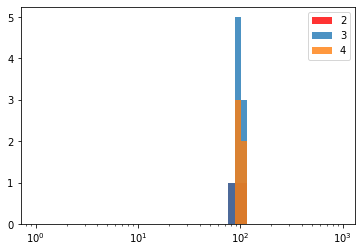

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['score']=='2']['length'],bins=bins,alpha=0.8, color = 'red')
plt.hist(df[df['score']=='3']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['score']=='4']['length'],bins=bins,alpha=0.8)
plt.legend(('2','3','4'))
plt.show()

In [17]:
df['similarity'].describe()

count    17.000000
mean      0.307449
std       0.054354
min       0.210280
25%       0.274533
50%       0.316589
75%       0.343458
max       0.401869
Name: similarity, dtype: float64

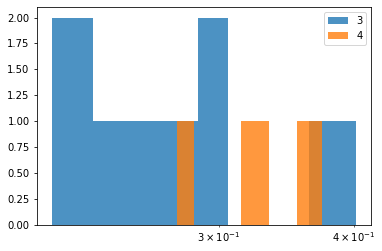

In [18]:
%matplotlib inline

plt.xscale('log')
#bins = 1.15**(np.arange(0,50))
plt.hist(df[df['score']=='3']['similarity'],alpha=0.8)
plt.hist(df[df['score']=='4']['similarity'],alpha=0.8)
plt.legend(('3','4'))
plt.show()

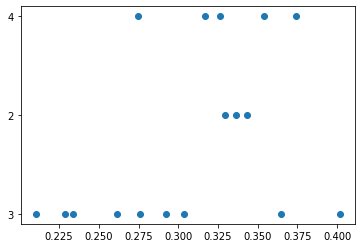

In [19]:
plt.scatter(similarity, score_list)

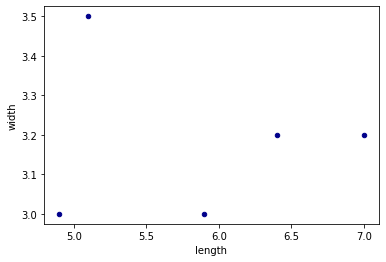

In [20]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],[6.4, 3.2, 1], [5.9, 3.0, 2]],columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                  y='width',
          c='DarkBlue')

In [21]:
X = df[['length','characters']] # note the double set of brackets
y = df['score']


KeyError: "['characters'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.43, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')

lr_model.fit(X_train, y_train)

In [ ]:
from sklearn import metrics

# Create a prediction set:
predictions = lr_model.predict(X_test)

# Print a confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
# You can make the confusion matrix less confusing by adding labels:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['0','3','4'], columns=['0','3','4'])
df

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

In [ ]:
predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)

In [ ]:
predictions = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

In [ ]:
print('hi')